In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv('dataset.csv')
df

,total_duration,no_of_messages,no_of_calls,esteem_sco,call_duration,social,ent,uti,game,sfd,result
0,0.336069,0.057692,0.303226,1.000000,0.401083,0.219995,0.010971,0.057883,0.247872,0.016577,1
1,0.813918,0.740385,0.267742,0.833333,0.182916,0.630602,0.107763,0.042677,0.000000,0.337055,1
2,0.448994,0.826923,0.000000,1.000000,0.000000,0.193951,0.363262,0.022152,0.000000,0.120765,1
3,0.585425,0.375000,0.087097,0.833333,0.005615,0.281815,0.417976,0.060604,0.000000,0.000043,1
4,0.771027,0.144231,0.154839,0.833333,0.147411,0.504567,0.295383,0.082652,0.000000,0.000581,1
5,0.445430,0.769231,0.329032,0.666667,0.275311,0.283818,0.084985,0.116730,0.000000,0.530555,1
6,0.672613,0.846154,0.335484,1.000000,0.408060,0.492040,0.146640,0.096381,0.000000,0.035658,0
7,0.134293,0.028846,0.225806,0.833333,0.698769,0.093084,0.053002,0.019022,0.000000,0.028720,0
8,0.677757,0.528846,0.306452,0.833333,0.306534,0.308292,0.285785,0.054130,0.432145,0.257820,1
9,0.474553,0.826923,0.474194,1.000000,0.295616,0.168580,0.173093,0.150682,0.476242,0.027399,1


In [3]:
train = df.drop(labels=['no_of_calls', 'call_duration', 'uti'], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('result',axis=1), 
                                                    train['result'], test_size=0.15, random_state = 101)

In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [10]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)

In [11]:
print(y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 1 1 1]
Accuracy: 0.5


In [12]:
train_pred = classifier.predict(X_train)

In [13]:
metrics.accuracy_score(y_train, train_pred)

0.7777777777777778

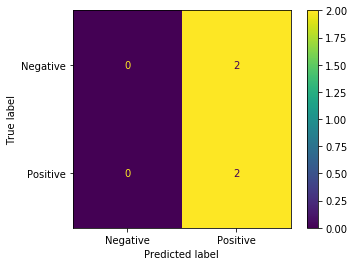

In [14]:
metrics.plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Negative', 'Positive'])